# Exercises
- Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.


In [122]:
import math
import evaluate


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


from pydataset import data

1. Load the tips dataset from either pydataset or seaborn.


In [3]:
#Loading tips
tips_df = data('tips')

In [4]:
#Looking at docs for tips
data('tips', show_doc=True) 

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

- Here is some sample code to get you started:

from sklearn.linear_model import LinearRegression

- assuming X and y are already defined:

model = LinearRegression().fit(X, y)
predictions = model.predict(X)

- Modify and add to the code above as necessary for it to work with the tips dataset.

In [5]:
tips_df['yhat_baseline'] = tips_df['tip'].mean()

In [6]:
tips_df

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,2.998279
241,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279
242,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279
243,17.82,1.75,Male,No,Sat,Dinner,2,2.998279


In [7]:
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(tips_df[['total_bill']], tips_df['tip'] )
tips_df['yhat'] = model.predict(tips_df[['total_bill']])

3. Plot the residuals for the linear regression model that you made.


In [8]:
#Residuals
tips_df['residuals'] = tips_df.tip - tips_df.yhat

In [9]:
#baseline residual
tips_df['baseline_residuals'] = tips_df.tip - tips_df.yhat_baseline

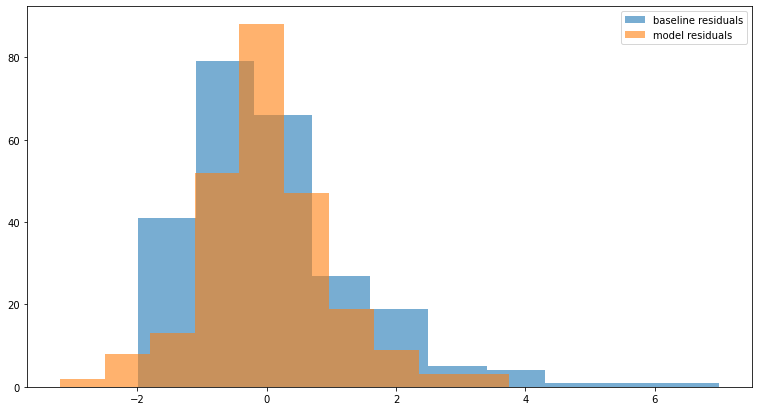

In [10]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.hist(tips_df.baseline_residuals, label='baseline residuals', alpha=.6)
ax.hist(tips_df.residuals, label='model residuals', alpha=.6)
ax.legend()

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [11]:
#sum of squared errors
sse = (tips_df.residuals ** 2).sum()

sse

252.788743850776

In [12]:
#setting n value
n= tips_df.shape[0]

In [13]:
#means squared error
mse= sse/n

mse

1.036019442011377

In [14]:
#root mean squared error
rmse= math.sqrt(mse)
rmse

1.0178504025697377

In [15]:
#explained sum of squares and total sum of squares
ess= ((tips_df.yhat_baseline- tips_df.tip.mean())**2).sum()

tss= ((tips_df.tip- tips_df.tip.mean())**2).sum()

print('ess: %.4f' % ess)

ess/tss

ess: 0.0000


0.0

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [16]:
#setting baselines
sse_baseline= (tips_df.baseline_residuals ** 2).sum()
mse_baseline = sse_baseline/ n
rmse_baseline= math.sqrt(mse_baseline)


print(f'''
Baseline:

sse: {sse_baseline}
mse: {mse_baseline}
rmse: {rmse_baseline}


''')


Baseline:

sse: 465.2124770491804
mse: 1.906608512496641
rmse: 1.3807999538298954





6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [17]:
if sse < sse_baseline:
    print("The model performs better than the baseline")
else:
    print("The baseline is better than the model")

The model performs better than the baseline


7. What is the amount of variance explained in your model?


In [18]:
r2_score(tips_df.tip, tips_df.yhat)

0.45661658635167657

In [19]:
r2_score(tips_df.tip, tips_df.yhat_baseline)

1.1102230246251565e-16

8. Is your model better than the baseline model?

In [20]:
#Answer: Yes because the model is closer to 1.

9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [21]:
def plot_residuals(y, df):
    #model
    model = LinearRegression().fit(df[['total_bill']], df[y] )
    df['yhat'] = model.predict(df[['total_bill']])
    
    df['yhat_baseline'] = df[y].mean()
    #Residuals
    df['residuals'] = df[y] - df['yhat']
     #baseline residual
    df['baseline_residuals'] = df[y] - df['yhat_baseline']
    #Visualize it
    fig, ax = plt.subplots(figsize=(13, 7))
    ax.hist(tips_df['baseline_residuals'], label='baseline residuals', alpha=.6)
    ax.hist(tips_df['residuals'], label='model residuals', alpha=.6)
    ax.legend()
    return

In [22]:
def regression_errors(y, yhat, df):
    #sum of squared errors
    sse = (df.residuals ** 2).sum()
    #setting n value
    n= tips_df.shape[0]
    #means squared error
    mse= sse/n
    #root mean squared error
    rmse= math.sqrt(mse)
    #explained sum of squares and total sum of squares
    ess= ((df.yhat_baseline- df.tip.mean())**2).sum()
    tss= ((df.tip- df.tip.mean())**2).sum()
    return (f''' Regression Error: sse: {sse}, mse: {mse}, rmse: {rmse}, ess: {ess}, tss: {tss} ''')

In [23]:
regression_errors(tips_df.tip, 'yhat', tips_df)

' Regression Error: sse: 252.788743850776, mse: 1.036019442011377, rmse: 1.0178504025697377, ess: 0.0, tss: 465.2124770491804 '

In [24]:
def baseline_mean_errors(df):
    #setting baselines
    sse_baseline= (df.baseline_residuals ** 2).sum()
    mse_baseline = sse_baseline/ len(df)
    rmse_baseline= math.sqrt(mse_baseline)
    return(f'''Baseline: sse: {sse_baseline}, mse: {mse_baseline}, rmse: {rmse_baseline}''')
    

In [25]:
baseline_mean_errors(tips_df)

'Baseline: sse: 465.2124770491804, mse: 1.906608512496641, rmse: 1.3807999538298954'

In [26]:
def better_than_baseline(df):
    sse_baseline = (df.baseline_residuals ** 2).sum()
    sse_model = (df.residuals ** 2).sum()
    return sse_model < sse_baseline


In [27]:
better_than_baseline(tips_df)

True

In [46]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residuals,baseline_residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [31]:
#Loading mpg
mpg= data('mpg')

In [32]:
#Looking at docs for tips
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [81]:
#creating functions
# def residuals(actual, predicted):
#     return actual - predicted

# def sse(actual, predicted):
#     return (residuals(actual, predicted) ** 2).sum()

# def mse(actual, predicted):
#     n = actual.shape[0]
#     return sse(actual, predicted) / n

# def rmse(actual, predicted):
#     return math.sqrt(mse(actual, predicted))

# def ess(actual, predicted):
#     return ((predicted - actual.mean()) ** 2).sum()

# def tss(actual):
#     return ((actual - actual.mean()) ** 2).sum()

# def r2_score(actual, predicted):
#     return ess(actual, predicted) / tss(actual)

In [123]:
#creating object and fitting it
model = LinearRegression().fit(mpg[['displ']], mpg.hwy)

In [124]:
#creating actual and predicted variables
actual = mpg.hwy # y
predicted = model.predict(mpg[['displ']]) # yhat

In [125]:
# regression errors function
# def regression_errors2(actual, predicted):
#     return pd.Series({
#         'sse': sse(actual, predicted),
#         'ess': ess(actual, predicted),
#         'tss': tss(actual),
#         'mse': mse(actual, predicted),
#         'rmse': rmse(actual, predicted),
#         'r2': r2_score(actual, predicted),
#     })

In [126]:
evaluate.regression_errors2(actual, predicted)

sse     3413.829009
ess     4847.833384
tss     8261.662393
mse       14.589013
rmse       3.819557
r2         0.586787
dtype: float64

In [127]:
#making yhat baseline
mpg['yhat_baseline'] = mpg['hwy'].mean()

In [128]:
mpg['yhat_baseline'] # looking at yhat baseline column

1      23.440171
2      23.440171
3      23.440171
4      23.440171
5      23.440171
         ...    
230    23.440171
231    23.440171
232    23.440171
233    23.440171
234    23.440171
Name: yhat_baseline, Length: 234, dtype: float64

In [129]:
#baseline residual
mpg['baseline_residuals'] = mpg.hwy - mpg.yhat_baseline

In [130]:
mpg['baseline_residuals'] # looking at baseline residual column

1      5.559829
2      5.559829
3      7.559829
4      6.559829
5      2.559829
         ...   
230    4.559829
231    5.559829
232    2.559829
233    2.559829
234    2.559829
Name: baseline_residuals, Length: 234, dtype: float64

In [131]:
#created yhat column
mpg['yhat'] = model.predict(mpg[['displ']])

In [132]:
#Residuals
mpg['residuals'] = mpg.hwy - mpg.yhat

In [133]:
mpg['residuals'], mpg['baseline_residuals'] # looking at some columns

(1     -0.342591
 2     -0.342591
 3      2.363527
 4      1.363527
 5      0.187998
          ...   
 230   -0.636473
 231    0.363527
 232    0.187998
 233    0.187998
 234    3.012469
 Name: residuals, Length: 234, dtype: float64,
 1      5.559829
 2      5.559829
 3      7.559829
 4      6.559829
 5      2.559829
          ...   
 230    4.559829
 231    5.559829
 232    2.559829
 233    2.559829
 234    2.559829
 Name: baseline_residuals, Length: 234, dtype: float64)

In [134]:
mpg[['displ', 'hwy', 'residuals','yhat_baseline', 'baseline_residuals', 'yhat']]

,displ,hwy,residuals,yhat_baseline,baseline_residuals,yhat
1,1.8,29,-0.342591,23.440171,5.559829,29.342591
2,1.8,29,-0.342591,23.440171,5.559829,29.342591
3,2.0,31,2.363527,23.440171,7.559829,28.636473
4,2.0,30,1.363527,23.440171,6.559829,28.636473
5,2.8,26,0.187998,23.440171,2.559829,25.812002
...,...,...,...,...,...,...
230,2.0,28,-0.636473,23.440171,4.559829,28.636473
231,2.0,29,0.363527,23.440171,5.559829,28.636473
232,2.8,26,0.187998,23.440171,2.559829,25.812002
233,2.8,26,0.187998,23.440171,2.559829,25.812002


In [135]:
#better than baseline function
# def better_than_baseline2(df):
#     sse_baseline = (df.baseline_residuals ** 2).sum()
#     sse_model = (df.residuals ** 2).sum()
#     return sse_model < sse_baseline


In [136]:
evaluate.better_than_baseline2(mpg)

True

In [137]:
#breaking it down
sse_baseline = (mpg.baseline_residuals ** 2).sum()

sse_baseline

8261.66239316239

In [138]:
#breaking it down
sse_model = (mpg.residuals ** 2).sum()

sse_model

3413.829008995467

In [139]:
#breaking it down
print(sse_model < sse_baseline)

True


In [140]:
#breaking it down
rmse(actual, predicted)

3.8195566312014524

In [141]:
#breaking it down
rmse(actual, actual.mean())

5.941906221359356

In [142]:
#another way to do baseline
# def better_than_baseline3(actual, predicted):
#     sse_baseline = sse(actual, actual.mean())
#     sse_model = sse(actual, predicted)
#     return sse_model < sse_baseline

In [143]:
evaluate.better_than_baseline3(actual, predicted)

True

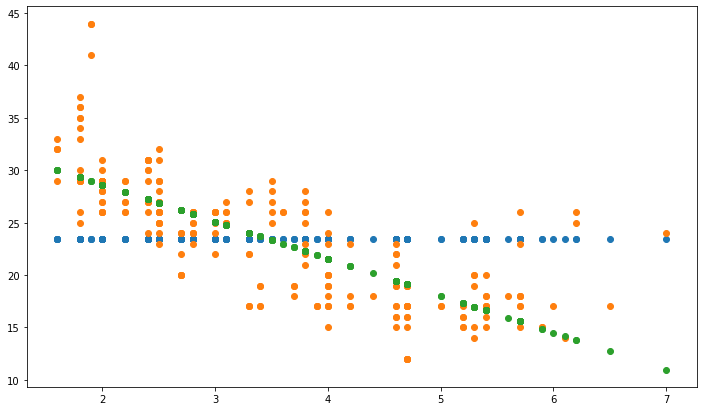

In [144]:
#visualize it
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(mpg.displ, mpg.yhat_baseline, label='baseline')
ax.scatter(mpg.displ, mpg.hwy, label='actual')
ax.scatter(mpg.displ, predicted, label='prediction')